In [24]:
import pandas as pd
import os


In [8]:
# Let's say you have your 10 datasets in a list or a folder
# Replace with actual file paths or use glob to read all CSVs from a folder
# removed kamal mudra as wrong dataset

In [25]:
file_paths = ["/Users/kartikraj/Desktop/EEG project files/Kartik/Kartik Chandra Mudra 7 june 5,20 pm 11 mins.csv",
             "/Users/kartikraj/Desktop/EEG project files/Kartik/Kartik Kanishtha mudra 7 june 5pm 11 mins.csv",
             "/Users/kartikraj/Desktop/EEG project files/Kartik/Kartik Kamal mudra 7june 6,40pm 11mins.csv",
             "/Users/kartikraj/Desktop/EEG project files/Kartik/Kartik Mrigi mudra 10june 8pm (1).csv",
             "/Users/kartikraj/Desktop/EEG project files/Kartik/Kartik Mushthi mudra 10 june 7 30 pm (1).csv",
             "/Users/kartikraj/Desktop/EEG project files/Kartik/kartik Prana mudra 10jun3 6,30pm (1).csv",
             "/Users/kartikraj/Desktop/EEG project files/Kartik/Kartik Saamana mudra 10june 6pm (1).csv",
             "/Users/kartikraj/Desktop/EEG project files/Kartik/Kartik Yoni Mudra 7June 19,18 11mins.csv",
             "/Users/kartikraj/Desktop/EEG project files/Kartik/kartik_pranammudra_05june-1pm-11mins.csv",
             "/Users/kartikraj/Desktop/EEG project files/Kartik/kartik_vajramudra_18;59_7june.csv",]

In [26]:
dataframes = []


In [27]:
for label, file_path in enumerate(file_paths):
    df = pd.read_csv(file_path)
    
    #dropping the data frames with Unnamed value columns
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    
    df['label'] = label
    dataframes.append(df)

In [28]:
final_df = pd.concat(dataframes, ignore_index=True)

In [29]:
print(final_df.head())
print(final_df.shape)

   Counter  Channel1  Channel2  Channel3  label
0      132 -0.006355  0.007076 -0.005532      0
1      133  0.005500  0.001964 -0.002671      0
2      134  0.013204  0.001348  0.001666      0
3      135  0.012575 -0.000566  0.004872      0
4      136  0.004676 -0.002999  0.006438      0
(3327500, 5)


In [31]:
%pip install pyod
import os
import numpy as np
from pyod.models import hbos
from pyod.utils.data import evaluate_print
from sklearn.metrics import confusion_matrix,cohen_kappa_score,f1_score
from scipy import signal
import matplotlib.pyplot as plt
import pickle
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


In [32]:
#####
# Trial or epoch = eeg segment
#####

channels = 3
seconds = 0.5    # Size of each segment we want
fs = 256.0         # Dtaset eeg sampling rate
data_portion = 1
save_model = False


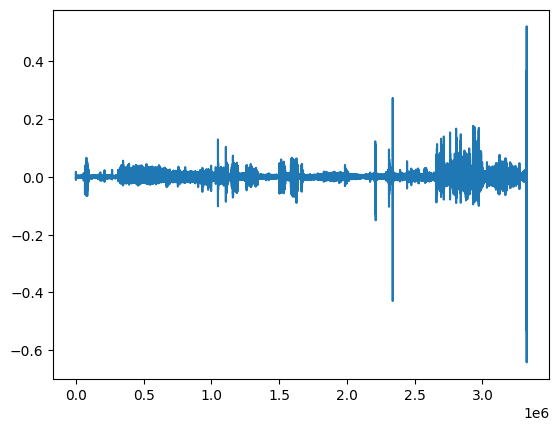

In [9]:
plt.plot(final_df['Channel1'])
#EMG data right hand

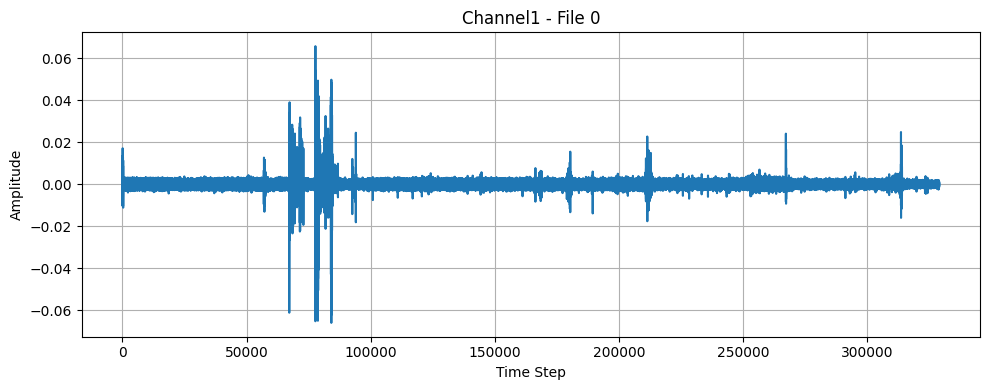

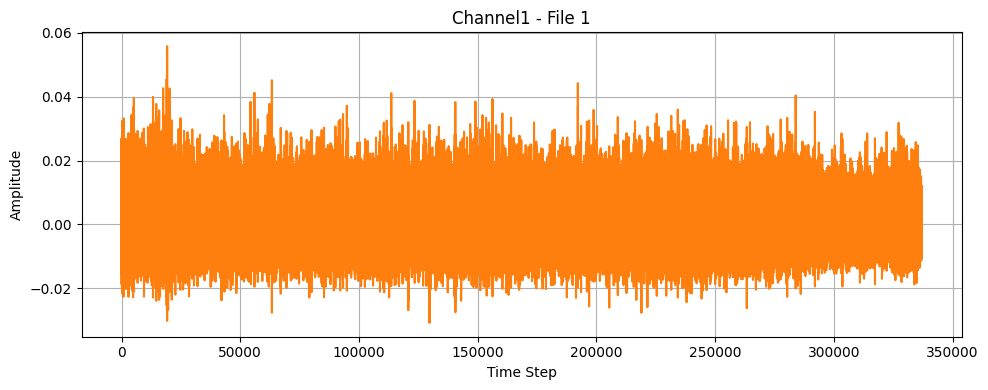

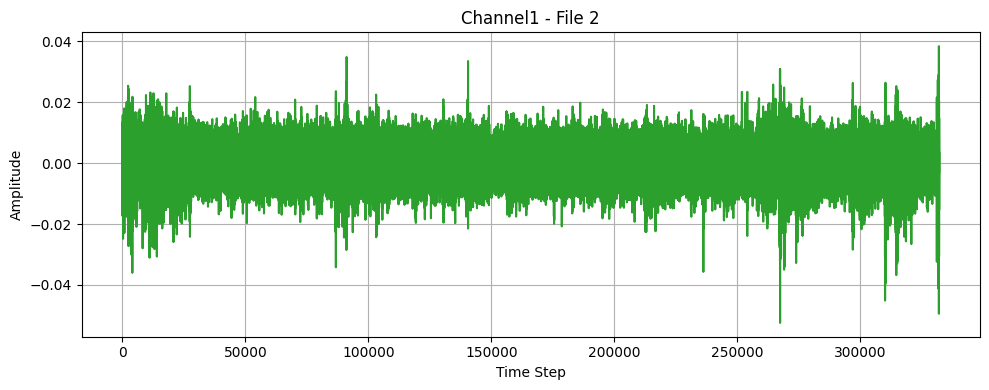

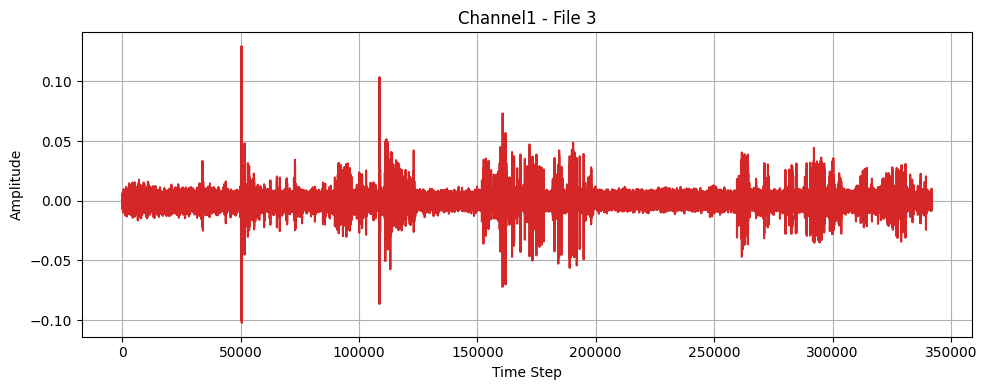

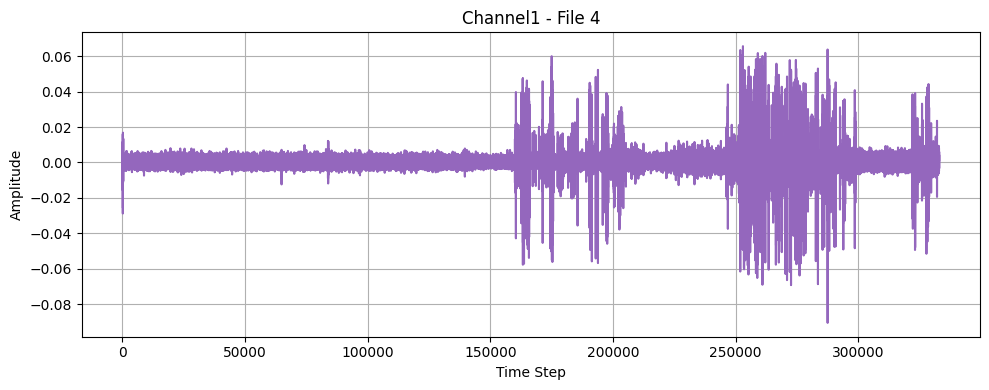

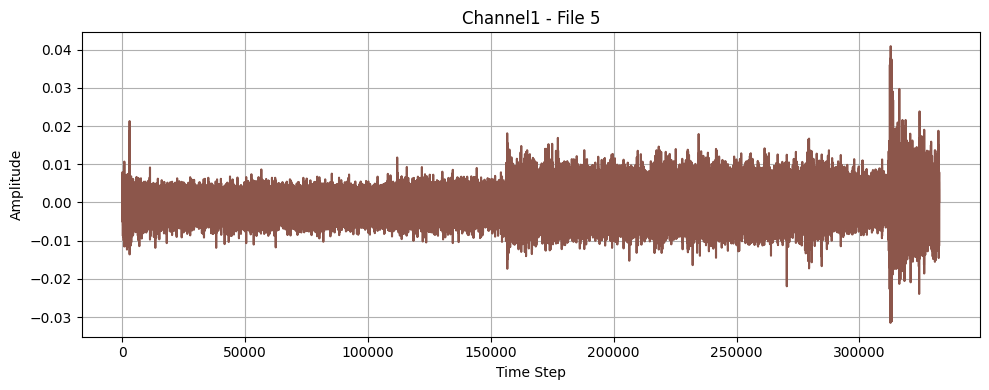

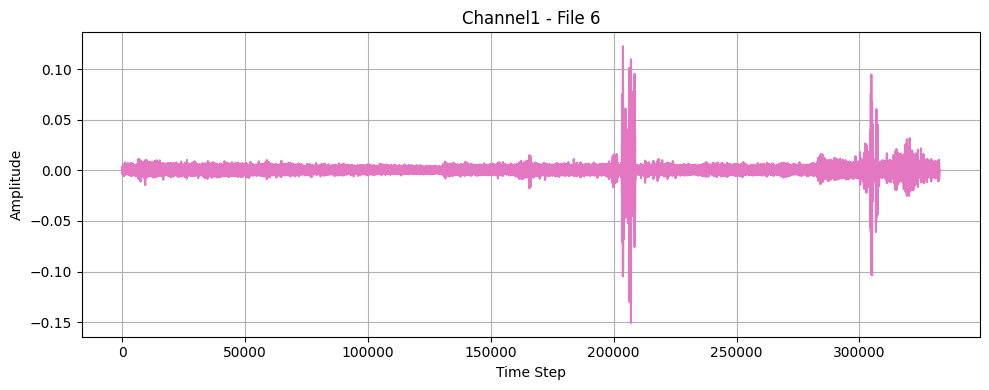

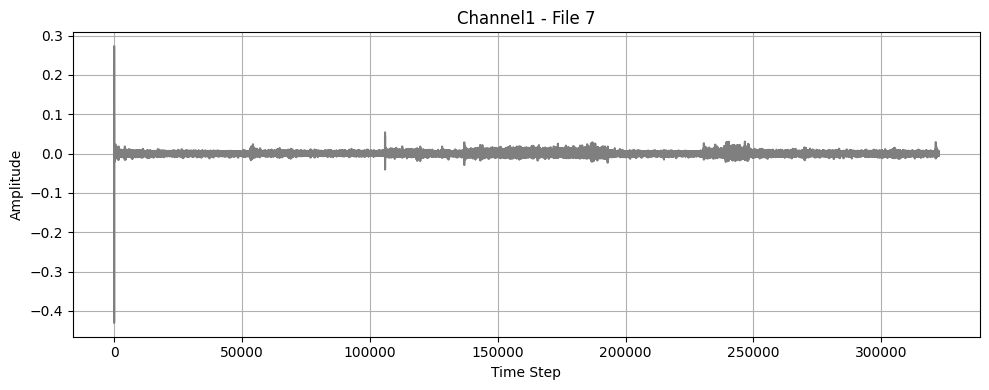

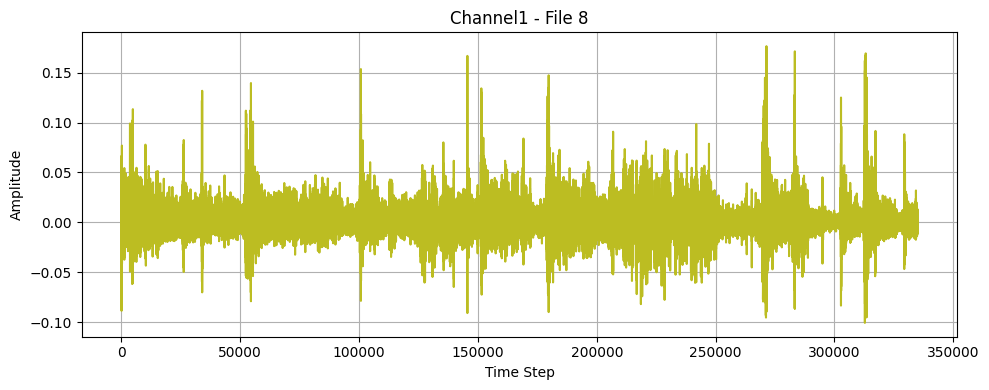

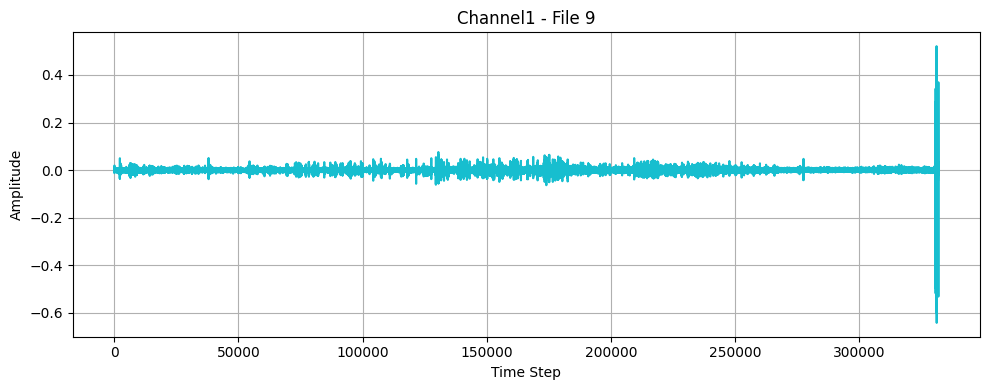

In [33]:
import matplotlib.cm as cm

colors = cm.tab10(np.linspace(0, 1, len(dataframes)))

for idx, (df, color) in enumerate(zip(dataframes, colors)):
    plt.figure(figsize=(10, 4))
    plt.plot(df['Channel1'], color=color)
    plt.title(f'Channel1 - File {idx}')
    plt.xlabel('Time Step')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

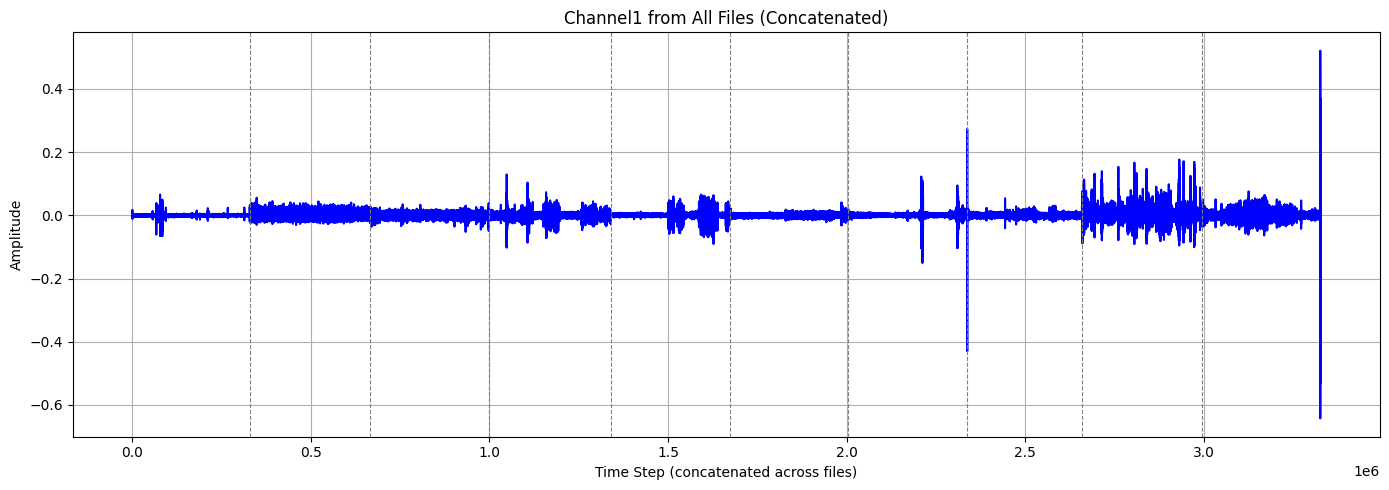

In [34]:
# Step 1: Concatenate Channel1 data from all files
channel1_concat = []
boundaries = []  # to mark where each file ends

for df in dataframes:
    channel1_concat.extend(df['Channel1'].values)
    boundaries.append(len(channel1_concat))  # save endpoint

# Step 2: Plot concatenated signal
plt.figure(figsize=(14, 5))
plt.plot(channel1_concat, color='blue')

# Optional: Add vertical lines to indicate file boundaries
for b in boundaries[:-1]:  # skip last one
    plt.axvline(x=b, color='gray', linestyle='--', linewidth=0.8)

plt.title("Channel1 from All Files (Concatenated)")
plt.xlabel("Time Step (concatenated across files)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

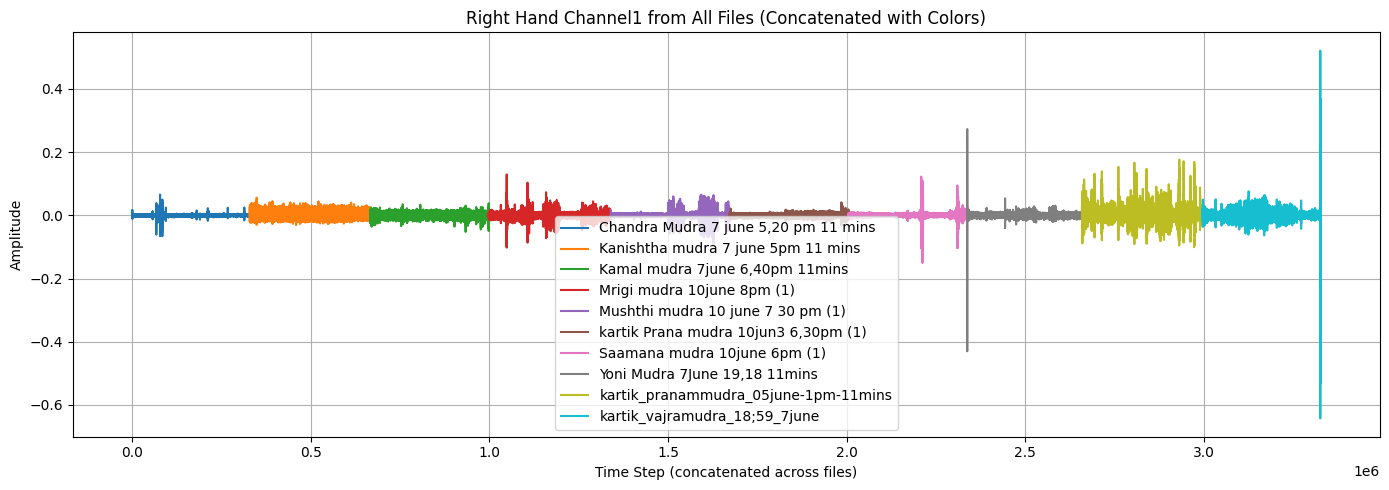

In [14]:

colors = cm.tab10(np.linspace(0, 1, len(dataframes)))

plt.figure(figsize=(14, 5))

start = 0
index = 0
for idx, (df, color) in enumerate(zip(dataframes, colors)):
    y = df['Channel1'].values
    x = np.arange(start, start + len(y))
    file_name = os.path.basename(file_paths[idx])
    label = file_name.replace(".csv", "").replace("Kartik", "").strip()  # clean label
    plt.plot(x, y, color=color, label=label)
    start += len(y)
    index = index + 1

plt.title("Right Hand Channel1 from All Files (Concatenated with Colors)")
plt.xlabel("Time Step (concatenated across files)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


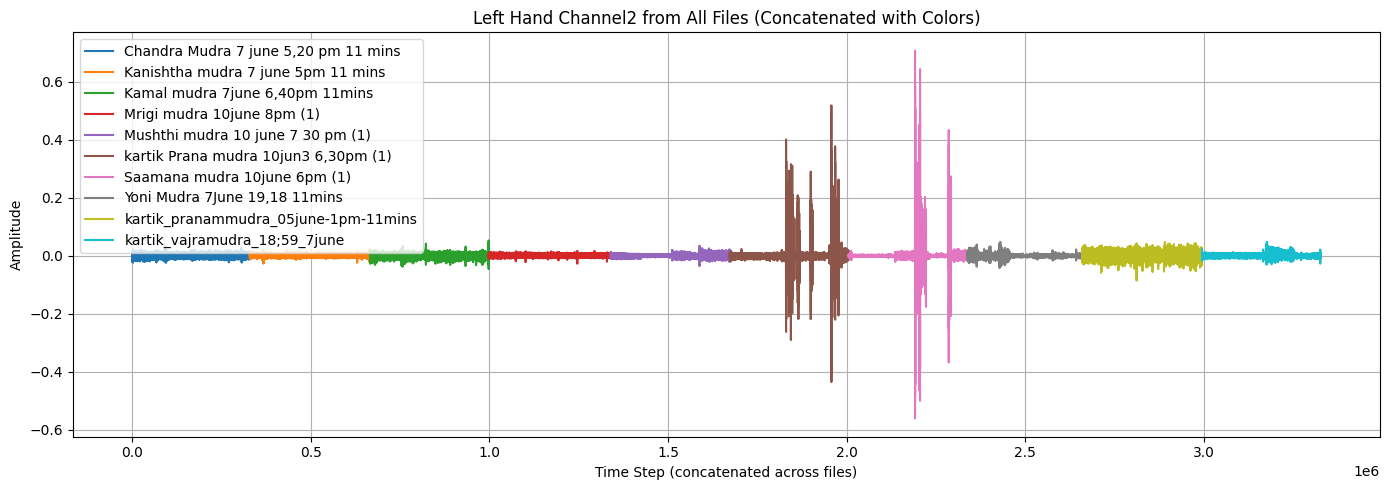

In [35]:

colors = cm.tab10(np.linspace(0, 1, len(dataframes)))

plt.figure(figsize=(14, 5))

start = 0
index = 0
for idx, (df, color) in enumerate(zip(dataframes, colors)):
    y = df['Channel2'].values
    x = np.arange(start, start + len(y))
    file_name = os.path.basename(file_paths[idx])
    label = file_name.replace(".csv", "").replace("Kartik", "").strip()  # clean label
    plt.plot(x, y, color=color, label=label)
    start += len(y)
    index = index + 1

plt.title("Left Hand Channel2 from All Files (Concatenated with Colors)")
plt.xlabel("Time Step (concatenated across files)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


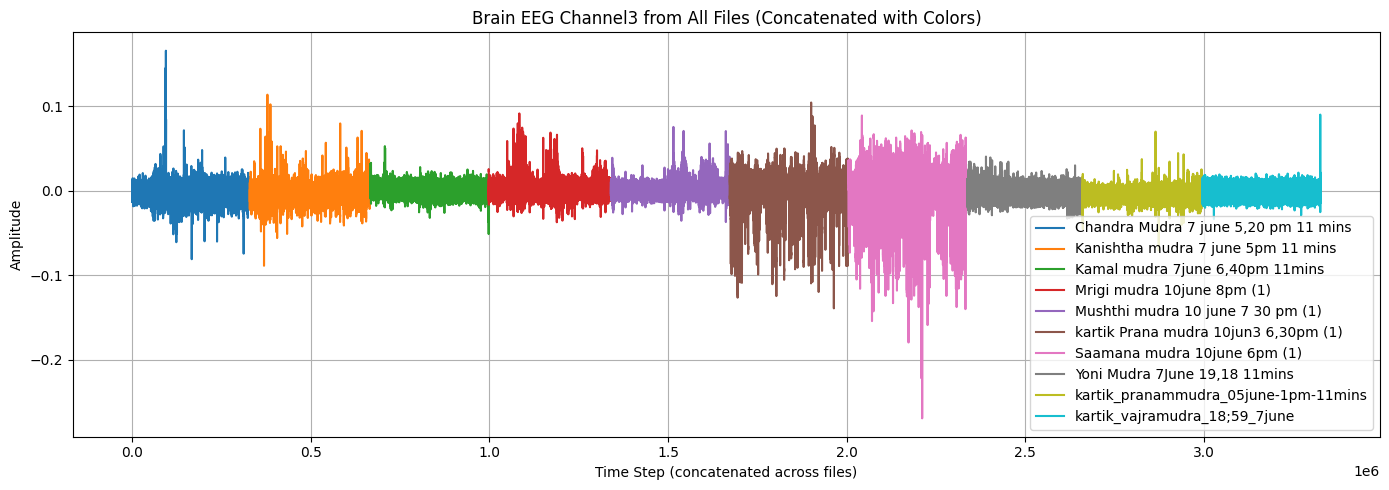

In [16]:

colors = cm.tab10(np.linspace(0, 1, len(dataframes)))

plt.figure(figsize=(14, 5))

start = 0
index = 0
for idx, (df, color) in enumerate(zip(dataframes, colors)):
    y = df['Channel3'].values
    x = np.arange(start, start + len(y))
    file_name = os.path.basename(file_paths[idx])
    label = file_name.replace(".csv", "").replace("Kartik", "").strip()  # clean label
    plt.plot(x, y, color=color, label=label)
    start += len(y)
    index = index + 1

plt.title("Brain EEG Channel3 from All Files (Concatenated with Colors)")
plt.xlabel("Time Step (concatenated across files)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
class EEGDataset2:
    def __init__(self, train_csv, seconds=0.500, fs=256, data_portion=1, normalize=True, isolated_channels=False):
        assert data_portion > 0.0 and data_portion <= 1, 'data_portion should be > 0 and <= 1'
        
        self.isolated_channels = isolated_channels
        self.normalize = normalize
        self.train_csv = train_csv
        self.seconds = seconds
        self.fs = fs
        self.data_portion = data_portion
    
    def get_data(self):
        df = pd.read_csv(self.train_csv)
        array_size = int(self.seconds * self.fs)
        # Dataset shape is: [data x channels]
        # we want shape: [segments x features]
        
        if self.normalize:
            df = (df - df.mean()) / df.std()
        
        if self.isolated_channels:
            channels = []
            for channel in df.columns[0:3]:
                isolated_channel = []
                for i in range(int(len(df) / array_size)):
                    isolated_channel.append(df[channel][i*array_size:(i+1)*array_size].to_numpy())
                channels.append(np.array(isolated_channel))
            return np.array(channels)
            
        dataset = []
        
        for channel in df.columns[0:3]:
            for i in range(int(len(df) / array_size)):
                dataset.append(df[channel][i*array_size:(i+1)*array_size].to_numpy())
                
        return np.array(dataset)

In [37]:
final_df.to_csv("/Users/kartikraj/Desktop/EEG project files/Kartik/final concatenated Kartik all.csv", index=False)
train_csv = './Kartik/final concatenated Kartik all.csv'
eegDataset = EEGDataset2(train_csv, seconds, fs, data_portion, normalize=True)

train_dataset = eegDataset.get_data()
train_dataset.shape

(77988, 128)

In [19]:

# Assuming train_dataset is a NumPy array
# Compute column-wise means, ignoring NaNs
col_mean = np.nanmean(train_dataset, axis=0)

# Find indices where NaNs are present
inds = np.where(np.isnan(train_dataset))

# Replace NaNs with the corresponding column mean
train_dataset[inds] = np.take(col_mean, inds[1])

# Now fit the model
clf = hbos.HBOS(n_bins=17, alpha=0.07, tol=0.5, contamination=0.15)
clf.fit(train_dataset)
train_dataset.shape

(77988, 128)

In [38]:

print("="*20)
print("TRAINING THE MODEL")

TRAINING THE MODEL


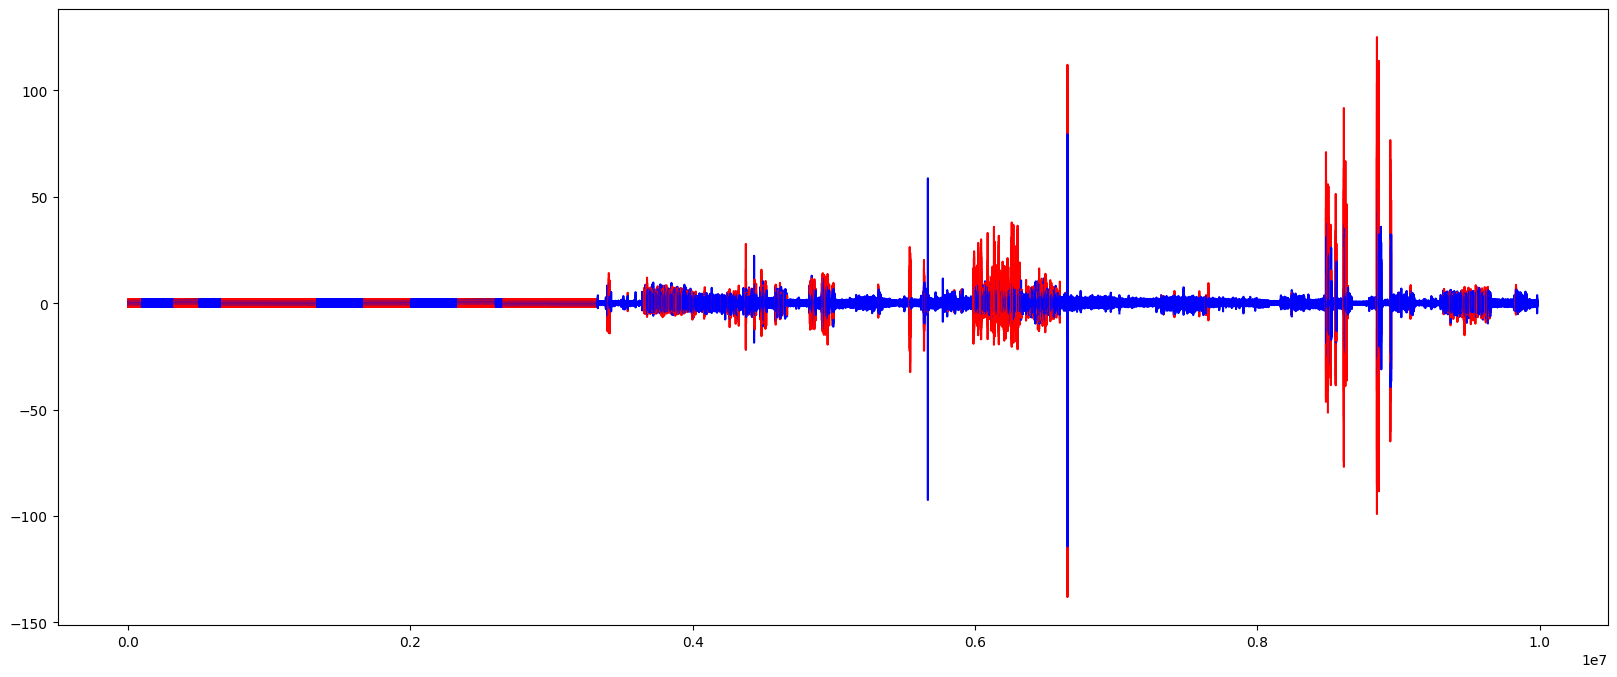

In [21]:
pred = clf.predict(train_dataset)

for i in range(len(pred)):
    plt.rcParams["figure.figsize"] = (20,8)
    
    if pred[i] == 1: plt.plot(range(128*i,128*(i+1)), train_dataset[i], color='red') #anamoly
    else: plt.plot(range(128*i,128*(i+1)), train_dataset[i], color='b')


#Here total values in x axis is 77988*128

In [62]:
# implementing models from now on
# implementing everything on raw data first

In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#importing Libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
tf.keras.backend.clear_session()
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import datasets, tree, linear_model, svm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [40]:
# Load the CSV file (no headers)

# If your data has multiple columns:
# For example, column 0: EEG, columns 1 & 2: EMG
emg1_data = final_df['Channel1'].values
emg2_data = final_df['Channel2'].values
eeg_data = final_df['Channel3'].values

In [41]:
#analysing channel1 data first and extracting features

In [42]:
final_df.head()

,Counter,Channel1,Channel2,Channel3,label
0,132,-0.006355,0.007076,-0.005532,0
1,133,0.005500,0.001964,-0.002671,0
2,134,0.013204,0.001348,0.001666,0
3,135,0.012575,-0.000566,0.004872,0
4,136,0.004676,-0.002999,0.006438,0


In [43]:
final_df.tail()

,Counter,Channel1,Channel2,Channel3,label
3327495,61,-0.002645,0.000263,0.008473,9
3327496,62,-0.003387,0.003427,0.008375,9
3327497,63,0.000248,0.002039,0.005053,9
3327498,64,0.001785,0.001773,0.001596,9
3327499,65,0.000494,-0.001661,-0.001349,9


In [44]:
m0 = final_df.loc[final_df["label"] == 0]
sample_m0 = m0.loc[0, 'Channel1':'Channel3'] if 0 in m0.index else None

m1 = final_df.loc[final_df["label"] == 1]
sample_m1 = m1.loc[1, 'Channel1':'Channel3'] if 1 in m1.index else None

m2 = final_df.loc[final_df["label"] == 2]
sample_m2 = m2.loc[2, 'Channel1':'Channel3'] if 2 in m2.index else None

m3 = final_df.loc[final_df["label"] == 3]
sample_m3 = m3.loc[3, 'Channel1':'Channel3'] if 3 in m3.index else None

m4 = final_df.loc[final_df["label"] == 4]
sample_m4 = m4.loc[4, 'Channel1':'Channel3'] if 4 in m4.index else None

m5 = final_df.loc[final_df["label"] == 5]
sample_m5 = m5.loc[5, 'Channel1':'Channel3'] if 5 in m5.index else None

m6 = final_df.loc[final_df["label"] == 6]
sample_m6 = m6.loc[6, 'Channel1':'Channel3'] if 6 in m6.index else None

m7 = final_df.loc[final_df["label"] == 7]
sample_m7 = m7.loc[7, 'Channel1':'Channel3'] if 7 in m7.index else None

m8 = final_df.loc[final_df["label"] == 8]
sample_m8 = m8.loc[8, 'Channel1':'Channel3'] if 8 in m8.index else None

m9 = final_df.loc[final_df["label"] == 9]
sample_m9 = m9.loc[9, 'Channel1':'Channel3'] if 9 in m9.index else None


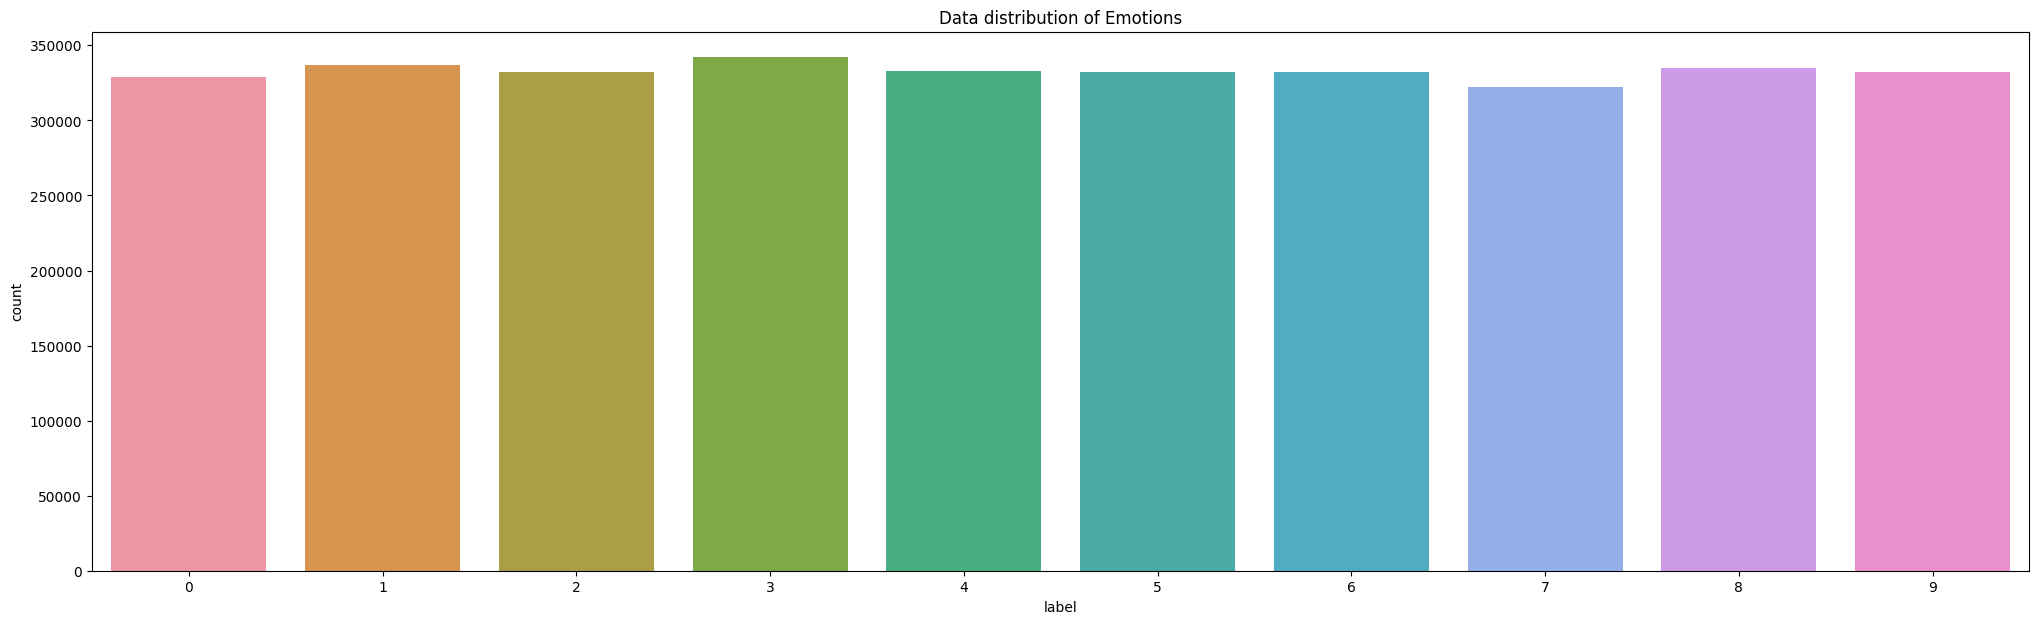

In [45]:
#plottintg Dataframe distribution
plt.figure(figsize=(25,7))
plt.title("Data distribution of Emotions")
plt.style.use('fivethirtyeight')
sns.countplot(x='label', data=final_df)
plt.show()


In [46]:
#above basically, we have all different labels for all different mudras

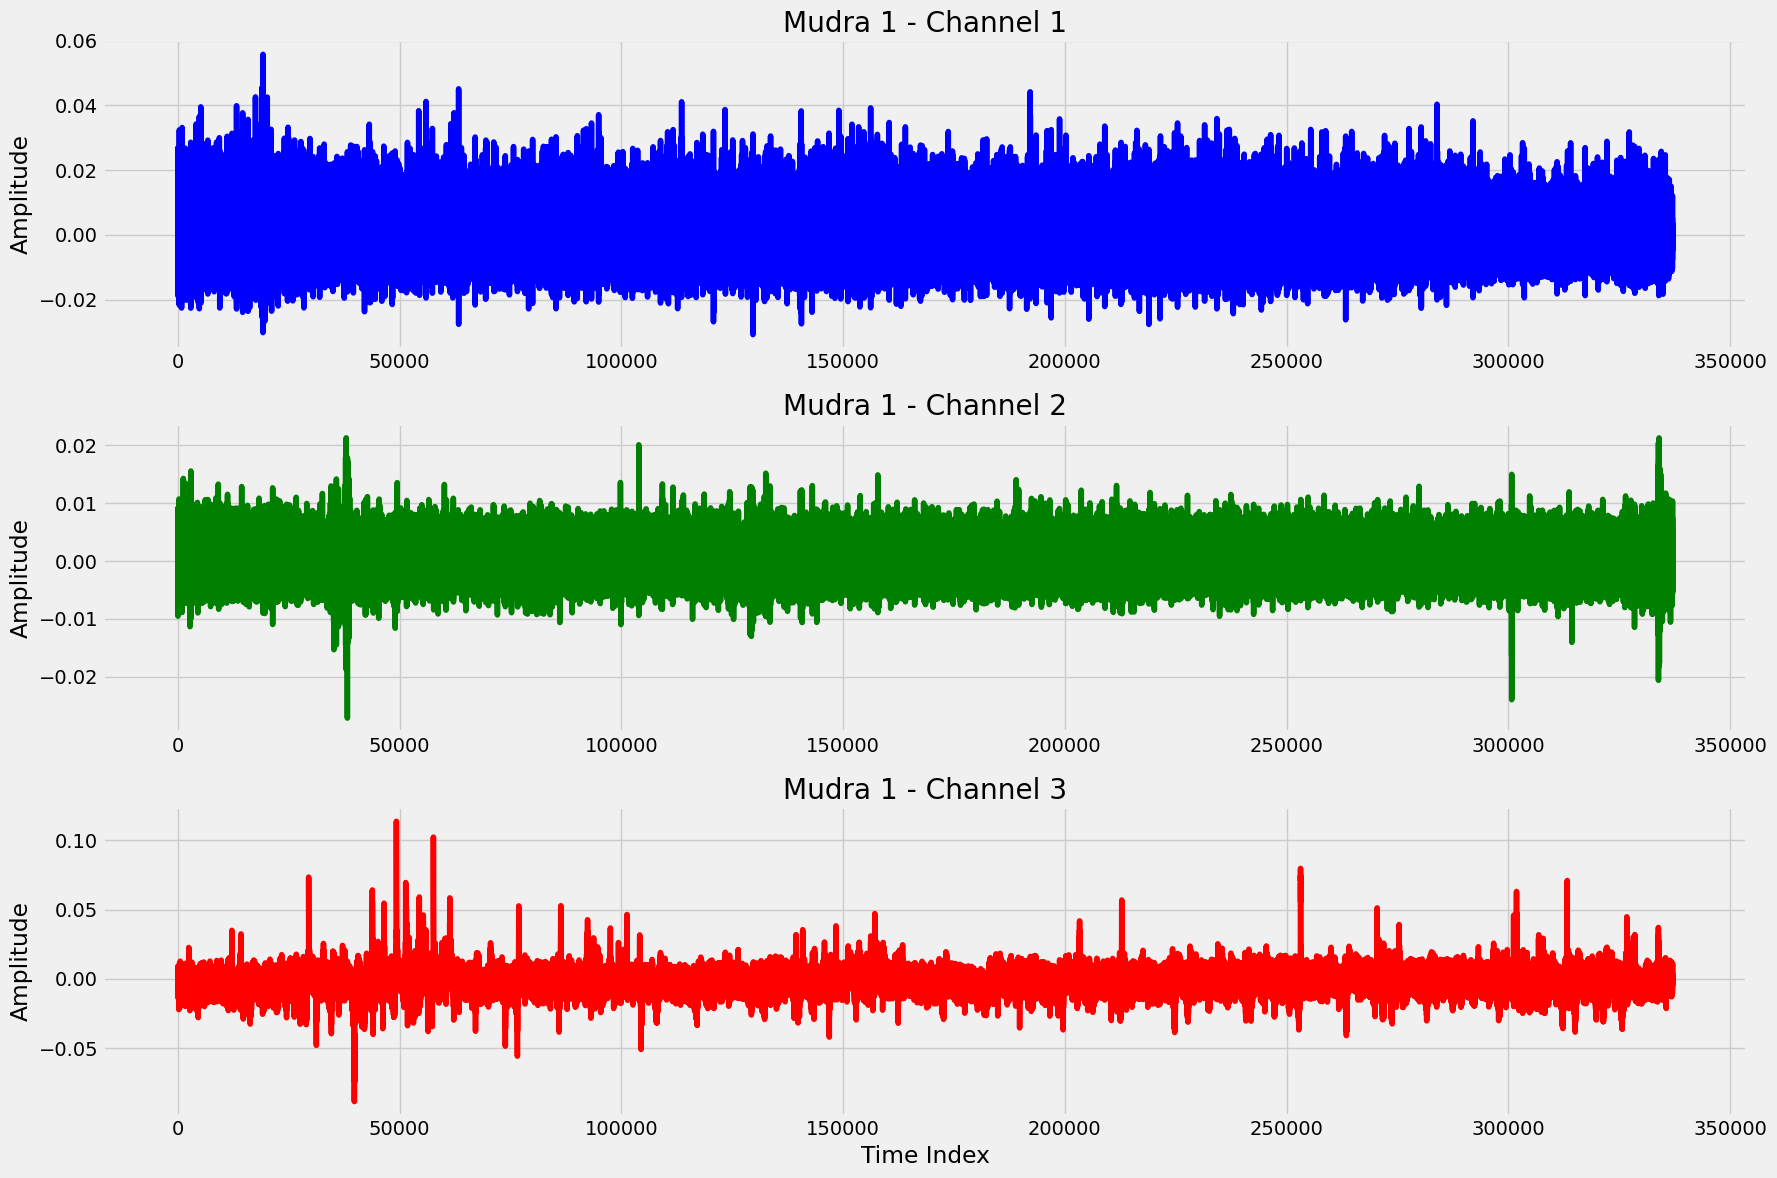

'For mudra1, channel1 lies from -0.02 to 0.04\nFor mudra1, channel1 lies from -0.01 to 0.01\nFor mudra1, channel1 lies from -0.05 to 0.05'

In [57]:
if m1 is not None and not m1.empty:
    plt.figure(figsize=(18, 12))

    # Channel 1
    plt.subplot(3, 1, 1)
    plt.plot(range(len(m1)), m1['Channel1'], color='blue')
    plt.title("Mudra 1 - Channel 1")
    plt.ylabel("Amplitude")

    # Channel 2
    plt.subplot(3, 1, 2)
    plt.plot(range(len(m1)), m1['Channel2'], color='green')
    plt.title("Mudra 1 - Channel 2")
    plt.ylabel("Amplitude")

    # Channel 3
    plt.subplot(3, 1, 3)
    plt.plot(range(len(m1)), m1['Channel3'], color='red')
    plt.title("Mudra 1 - Channel 3")
    plt.ylabel("Amplitude")
    plt.xlabel("Time Index")

    plt.tight_layout()
    plt.show()
else:
    print("No data found for label == 1")


'''For mudra1, channel1 lies from -0.02 to 0.04
For mudra1, channel1 lies from -0.01 to 0.01
For mudra1, channel1 lies from -0.05 to 0.05'''

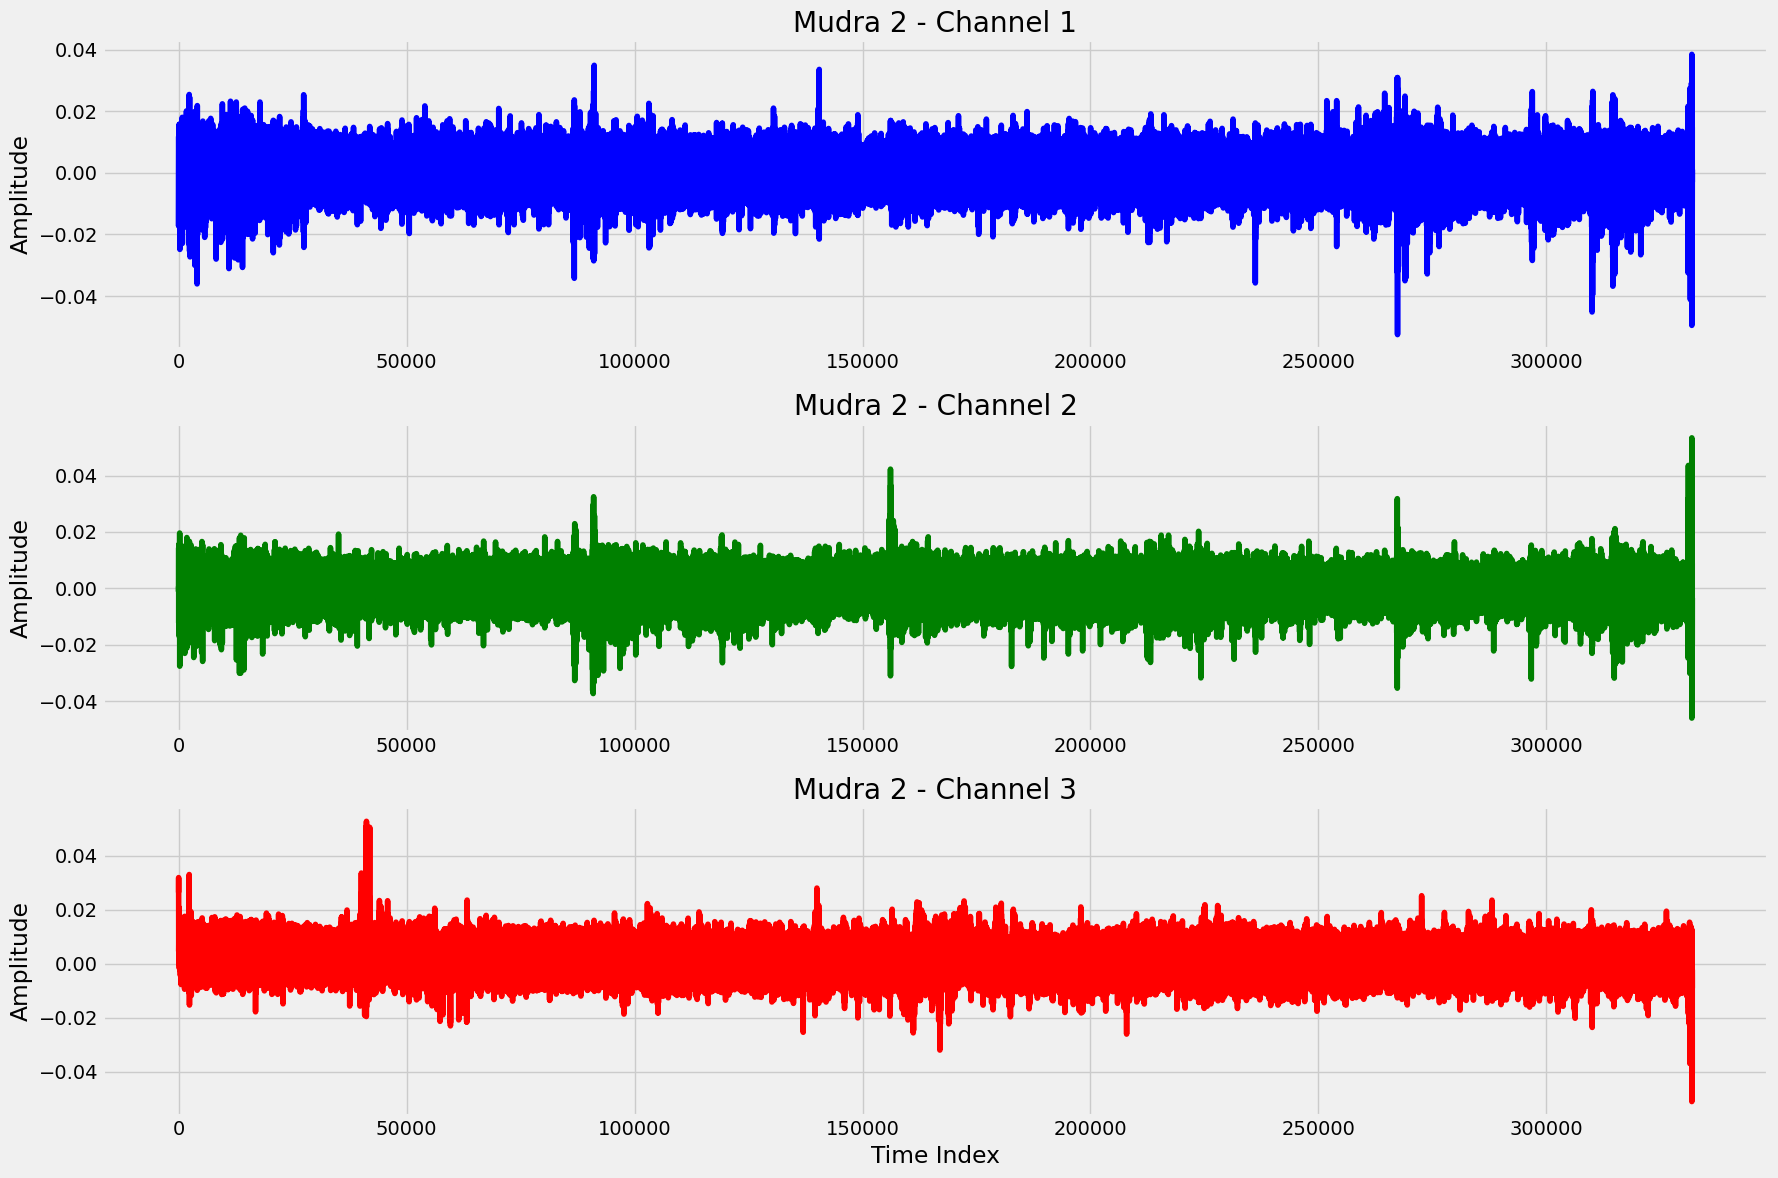

'For mudra1, channel1 lies from -0.02 to 0.02\nFor mudra1, channel1 lies from -0.02 to 0.02\nFor mudra1, channel1 lies from -0.02 to 0.02'

In [48]:
if m2 is not None and not m2.empty:
    plt.figure(figsize=(18, 12))

    # Channel 1
    plt.subplot(3, 1, 1)
    plt.plot(range(len(m2)), m2['Channel1'], color='blue')
    plt.title("Mudra 2 - Channel 1")
    plt.ylabel("Amplitude")

    # Channel 2
    plt.subplot(3, 1, 2)
    plt.plot(range(len(m2)), m2['Channel2'], color='green')
    plt.title("Mudra 2 - Channel 2")
    plt.ylabel("Amplitude")

    # Channel 3
    plt.subplot(3, 1, 3)
    plt.plot(range(len(m2)), m2['Channel3'], color='red')
    plt.title("Mudra 2 - Channel 3")
    plt.ylabel("Amplitude")
    plt.xlabel("Time Index")

    plt.tight_layout()
    plt.show()
else:
    print("No data found for label == 1")


'''For mudra1, channel1 lies from -0.02 to 0.02
For mudra1, channel1 lies from -0.02 to 0.02
For mudra1, channel1 lies from -0.02 to 0.02'''

In [58]:
def Transform_data(data):
    data_encoded = data
    #getting brain signals into x variable
    x=data_encoded.drop(["Class",]  ,axis=1)
    #getting labels into y variable
    y = data_encoded.loc[:,'Class'].values
    scaler = StandardScaler()
    #scaling Brain Signals
    scaler.fit(x)
    X = scaler.transform(x)
    #One hot encoding Labels 
    Y = to_categorical(y)
    return X,Y

In [59]:
features_1 = pd.read_csv("./Features all/extracted_features_enoch.csv")
features_2 = pd.read_csv("./Features all/extracted_features_kartik.csv")
features_3 = pd.read_csv("./Features all/extracted_features_muskan.csv")

In [60]:
combined_features = pd.concat([features_1, features_2, features_3], ignore_index=True)


In [171]:
X,Y = Transform_data(combined_features)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)


In [62]:
print(np.unique(y_train))

[0. 1.]


In [172]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [173]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [174]:
x_train.shape[1]

30

In [175]:
x_train[0]
#This contain channel 1 2 and 3 for each row

array([ 0.16,  0.53, -0.45,  1.13,  0.83, -0.03, -0.04, -0.06, -0.07,
        0.02,  0.82, -0.07,  0.04,  0.  , -0.02, -0.01, -0.02, -0.02,
       -0.13, -0.13, -0.34, -0.95,  0.33, -0.91, -1.01, -0.2 , -0.25,
       -0.21, -0.08, -0.79])

In [176]:
from tensorflow.keras.layers import Lambda

def create_model():
    # Input layer
    inputs = tf.keras.Input(shape=(x_train.shape[1],))

    # Expand dims using a Lambda layer
    expand_dims = Lambda(lambda x: tf.expand_dims(x, axis=2))(inputs)

    # GRU Layer
    gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)

    # Flatten Layer
    flatten = tf.keras.layers.Flatten()(gru)

    # Output Layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(flatten)

    # Model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.summary()
    return model


In [70]:
#cretaing model
lstmmodel = create_model()
#Compiling model 
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
lstmmodel.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_1 (Lambda)               │ (None, 30, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 30, 256)        │       198,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7680)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        76,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275,722 (1.05 MB)

 Trainable params: 275,722 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
import numpy as np
print(np.isnan(x_train).sum(), np.isinf(x_train).sum())
print(np.isnan(y_train).sum(), np.isinf(y_train).sum())

0 0
0 0


In [72]:
!pip install torch
import torch
# Check for NaNs in inputs
assert not torch.isnan(inputs).any(), "NaN in inputs"
assert not torch.isnan(labels).any(), "NaN in labels"

# Log gradients
for name, param in model.named_parameters():
    if param.grad is not None:
        print(f"{name}: grad max {param.grad.max()}, min {param.grad.min()}")

# Clip gradients
torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

NameError: name 'inputs' is not defined

In [73]:
#Training and Evaluting model
history = lstmmodel.fit(x_train, y_train, epochs = 50, validation_split=0.1)
loss, acc = lstmmodel.evaluate(x_test, y_test)

Epoch 1/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.3544 - loss: 1.8109 - val_accuracy: 0.6320 - val_loss: 1.1022
Epoch 2/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6447 - loss: 1.0227 - val_accuracy: 0.7196 - val_loss: 0.8365
Epoch 3/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.7328 - loss: 0.7848 - val_accuracy: 0.7662 - val_loss: 0.7048
Epoch 4/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7723 - loss: 0.6684 - val_accuracy: 0.7823 - val_loss: 0.6362
Epoch 5/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 61s 38ms/step - accuracy: 0.7912 - loss: 0.6045 - val_accuracy: 0.8060 - val_loss: 0.5840
Epoch 6/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.8131 - loss: 0.5475 - val_accuracy: 0.8186 - val_loss: 0.5396
Epoch 7/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.8257 - loss: 0.5031 - val_accuracy: 0.8313 - val_loss: 0.5016
Epoch 8/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.8398 -

In [74]:
pred  = lstmmodel.predict(x_test)

442/442 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step


In [76]:
#Loss and Accuracy of model on Testiong Dataset 
print(f"Loss on testing: {loss*100}",f"\nAccuracy on Training: {acc*100}")


Loss on testing: 23.71290922164917 
Accuracy on Training: 92.33819842338562


In [77]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(features_enoch.Class.unique()))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [78]:
#after getting prediction checking maximum score prediction to claim which emotion this brain signal belongs to
pred1 = np.argmax(pred,axis=1)

In [79]:
#inversing the one hot encoding
y_test1 =   np.argmax(y_test,axis=1)

In [80]:
#printing first 10 Actual and predicted outputs of Test brain signals 
print("Predicted:  ",pred1[:10])
print("\n")
print("Actual: ",y_test1[:10])

Predicted:   [6 7 5 2 6 9 5 1 7 8]


Actual:  [6 7 5 2 6 9 5 1 7 8]


Confusion matrix, without normalization
[[1516   14    2    5    2    7    9    0    6   14]
 [   5 1102   24   74    4    6   19    0    4   37]
 [   0   20 1438   11    2    4    6    0   10    9]
 [   2   52    9 1330    6    7    4    1   28    7]
 [   2    1    3   23 1225    5    6   28   22   11]
 [   3    3    1   28    8 1228    9   21   28    2]
 [   4   11    6   15   28    4 1478    1    3    4]
 [   2    0    1    4    1   21    2 1548    0    0]
 [   7   13   16   72   27   36    6    5 1014   75]
 [  12   27    9   12    6    2    4    2   30 1161]]


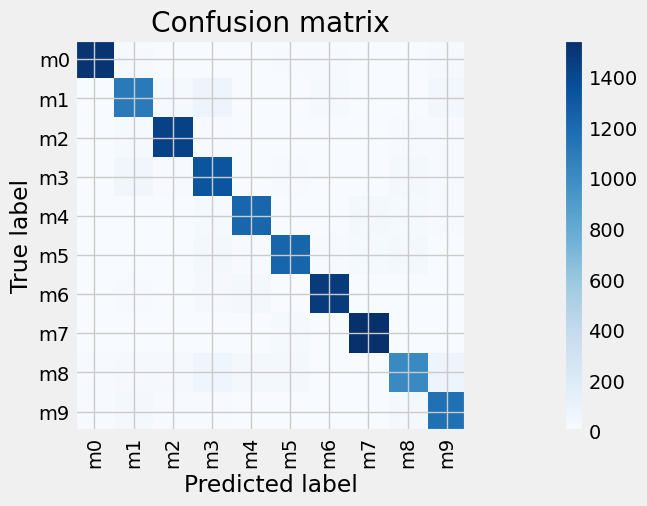

In [81]:
#Plotting Confusion matrix of Lstm Model
cm = confusion_matrix(y_test1, pred1)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.rcParams["figure.figsize"]=(20,5)
plt.figure()
plot_confusion_matrix(cm,["m0","m1","m2","m3","m4","m5","m6","m7","m8","m9"])

In [82]:
names1 = ["m0","m1","m2","m3","m4","m5","m6","m7","m8","m9"]



*		Classification Report GNB:
               precision    recall  f1-score   support

           0       0.19      0.87      0.31      1575
           1       0.29      0.21      0.24      1275
           2       0.66      0.06      0.11      1500
           3       0.47      0.20      0.28      1446
           4       0.10      0.00      0.00      1326
           5       0.27      0.01      0.03      1331
           6       0.35      0.25      0.29      1554
           7       0.44      0.22      0.30      1579
           8       0.11      0.22      0.15      1271
           9       0.19      0.10      0.13      1265

    accuracy                           0.22     14122
   macro avg       0.31      0.21      0.18     14122
weighted avg       0.32      0.22      0.19     14122


*		Classification Report SVM:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      1575
           1       0.67      0.58      0.62      1275
           2  

/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



*		Classification Report LR:
               precision    recall  f1-score   support

           0       0.68      0.82      0.74      1575
           1       0.54      0.22      0.31      1275
           2       0.58      0.62      0.60      1500
           3       0.34      0.44      0.39      1446
           4       0.45      0.31      0.37      1326
           5       0.48      0.41      0.44      1331
           6       0.69      0.53      0.60      1554
           7       0.69      0.91      0.78      1579
           8       0.36      0.46      0.41      1271
           9       0.51      0.53      0.52      1265

    accuracy                           0.54     14122
   macro avg       0.53      0.52      0.52     14122
weighted avg       0.54      0.54      0.53     14122


*		Classification Report Deccsion Tree:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1575
           1       0.83      0.81      0.82      1275
     

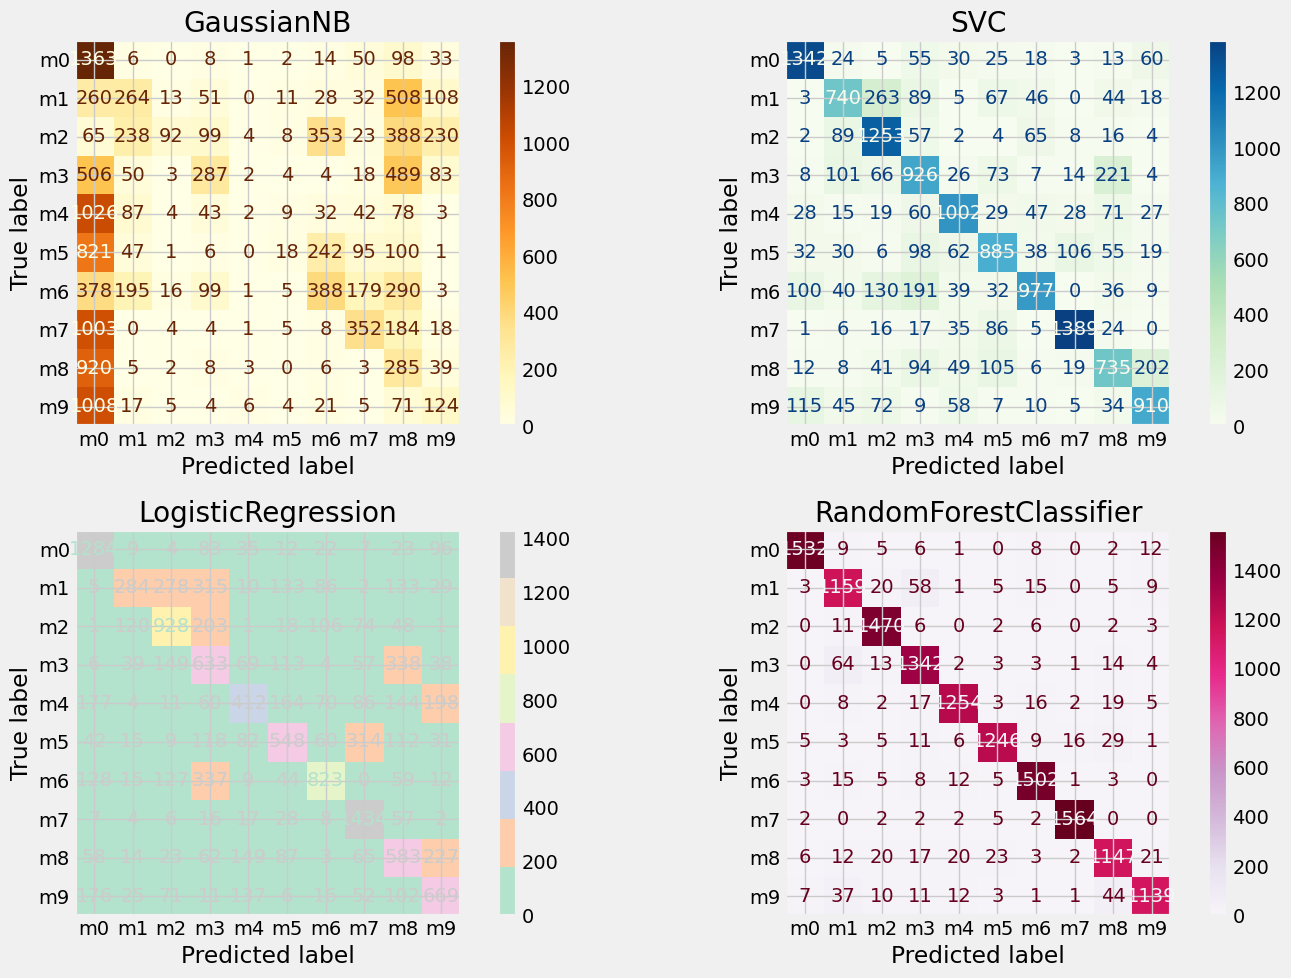

In [87]:
from sklearn.naive_bayes import GaussianNB
from sklearn import svm, linear_model, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Training and classification reports (your original logic)
Classifier_gnb = GaussianNB().fit(x_train, np.argmax(y_train, axis=1))
pred_gnb = Classifier_gnb.predict(x_test)
print('\n*\t\tClassification Report GNB:\n', classification_report(np.argmax(y_test, axis=1), pred_gnb))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test, axis=1), pred_gnb)

Classifier_svm = svm.SVC(kernel='linear').fit(x_train, np.argmax(y_train, axis=1))
pred_svm = Classifier_svm.predict(x_test)
print('\n*\t\tClassification Report SVM:\n', classification_report(np.argmax(y_test, axis=1), pred_svm))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test, axis=1), pred_svm)

Classifier_LR = linear_model.LogisticRegression(solver='liblinear', C=75).fit(x_train, np.argmax(y_train, axis=1))
pred_LR = Classifier_LR.predict(x_test)
print('\n*\t\tClassification Report LR:\n', classification_report(np.argmax(y_test, axis=1), pred_LR))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test, axis=1), pred_LR)

Classifier_dt = tree.DecisionTreeClassifier().fit(x_train, np.argmax(y_train, axis=1))
pred_dt = Classifier_dt.predict(x_test)
print('\n*\t\tClassification Report Deccsion Tree:\n', classification_report(np.argmax(y_test, axis=1), pred_dt))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test, axis=1), pred_dt)

Classifier_forest = RandomForestClassifier(n_estimators=50, random_state=0).fit(x_train, np.argmax(y_train, axis=1))
pred_fr = Classifier_forest.predict(x_test)
print('\n*\t\tClassification Report Random Forest:\n', classification_report(np.argmax(y_test, axis=1), pred_fr))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test, axis=1), pred_fr)

# Plotting confusion matrices
classifiers = [
    Classifier_gnb,
    Classifier_svm,
    Classifier_LR,
    Classifier_forest
]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
colors = ['YlOrBr', 'GnBu', 'Pastel2', 'PuRd']
for cls, ax, c in zip(classifiers, axes.flatten(), colors):
    ConfusionMatrixDisplay.from_estimator(
        cls,
        x_test,
        np.argmax(y_test, axis=1),
        ax=ax,
        cmap=c,
        display_labels=names1
    )
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()
plt.show()


In [88]:
#Classification Report of Lstm model
print('\n*\t\tClassification Report OF Brain Waves LSTM:\n', classification_report(np.argmax(y_test,axis=1), np.argmax(lstmmodel.predict(x_test),axis=1) ))

442/442 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step

*		Classification Report OF Brain Waves LSTM:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1575
           1       0.89      0.86      0.88      1275
           2       0.95      0.96      0.96      1500
           3       0.84      0.92      0.88      1446
           4       0.94      0.92      0.93      1326
           5       0.93      0.92      0.93      1331
           6       0.96      0.95      0.95      1554
           7       0.96      0.98      0.97      1579
           8       0.89      0.80      0.84      1271
           9       0.88      0.92      0.90      1265

    accuracy                           0.92     14122
   macro avg       0.92      0.92      0.92     14122
weighted avg       0.92      0.92      0.92     14122



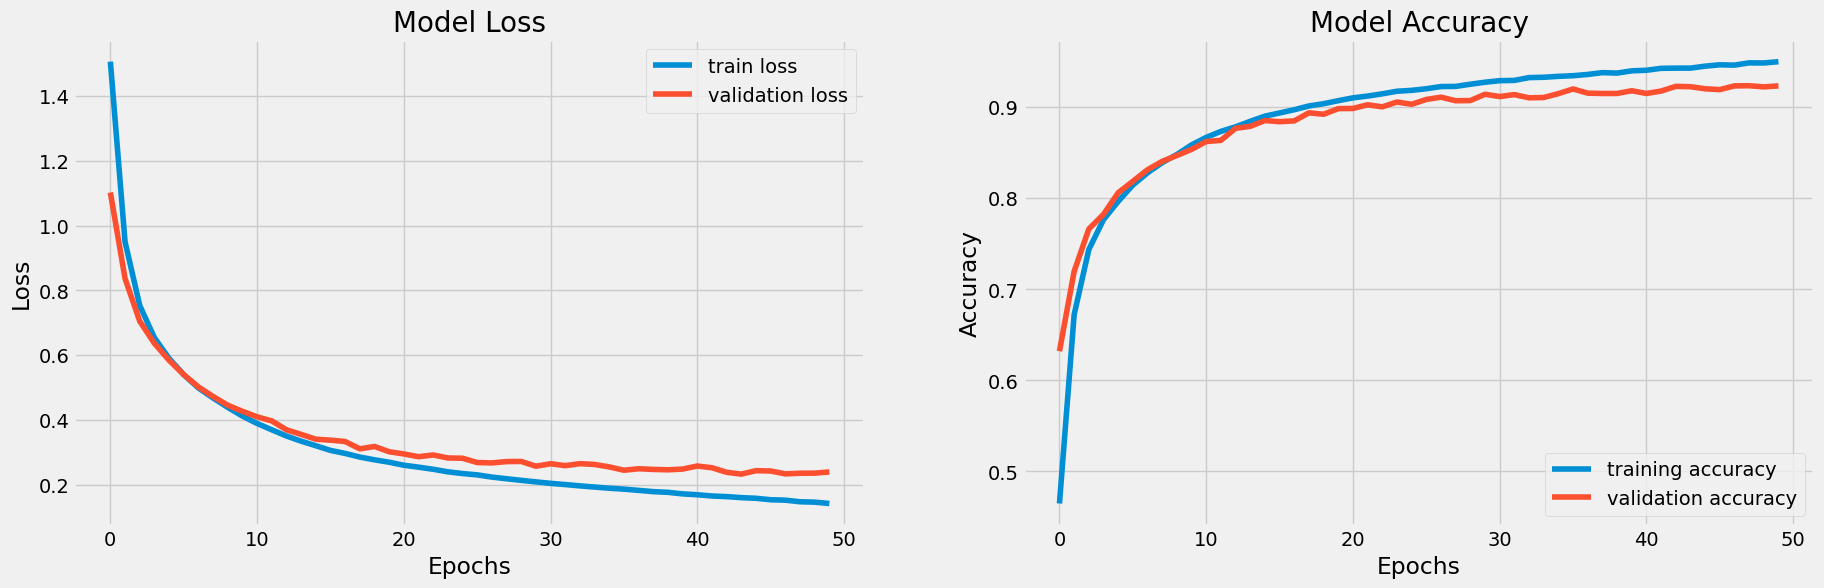

In [89]:
#Plotting Graph of Lstm model Training, Loss and Accuracy
plt.style.use("fivethirtyeight")
plt.figure(figsize = (20,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss",fontsize=20)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train loss', 'validation loss'], loc ='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy",fontsize=20)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training accuracy', 'validation accuracy'], loc ='best')
plt.show()

In [109]:
KartikFeatures = pd.read_csv("/Users/kartikraj/Desktop/EEG project files/Features extraction Rishitha/extracted_featuresrishitha.csv")

In [157]:
X1,Y1 = Transform_data(KartikFeatures)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X1, Y1, test_size = 0.9, random_state = 4)

In [116]:
x_test2.shape

(19716, 30)

In [117]:
pred2  = lstmmodel.predict(x_test2)

617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


Confusion matrix, without normalization
[[1060  899  158  103    3   29   35   15    4   40]
 [  71  398   85   34  480  159  358    9  422  188]
 [  14  638  214  122   52  485  448  100   68   90]
 [ 351    1    3    3  232   23    0 1591    4   16]
 [   8    8   93   33   15  194    0 1490   39  148]
 [   0    1    0    0    1    0   70    1    0    1]
 [  44   49 1377   14   54   19  726    2    0   47]
 [ 417  224  354  171   10  147  187  204  216   26]
 [ 484   76    1    1  243   75   79  881  300   33]
 [ 185  279   24  138  152  160  441  292  460   17]]


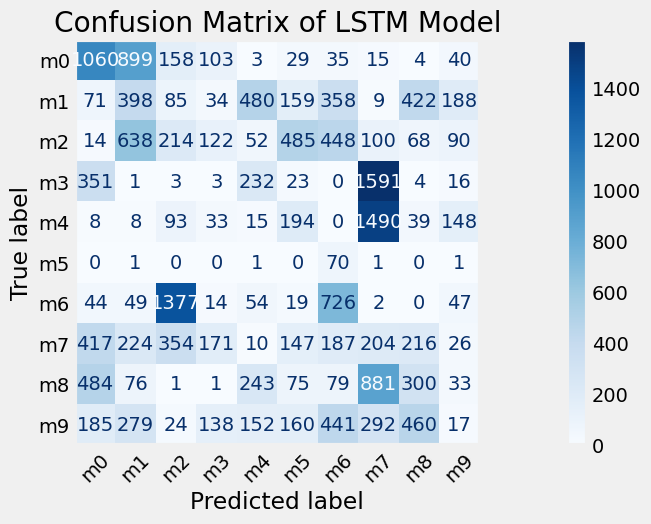

In [118]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Convert one-hot encoded true and predicted labels to class indices
y_test_labels = np.argmax(y_test2, axis=1)
pred_labels = np.argmax(pred2, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_labels, pred_labels)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)

# Plot confusion matrix
plt.rcParams["figure.figsize"] = (20, 5)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["m0", "m1", "m2", "m3", "m4", "m5", "m6", "m7", "m8", "m9"])
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix of LSTM Model")
plt.grid(False)
plt.show()


In [122]:
#Classification Report of Lstm model
print('\n*\t\tClassification Report OF Brain Waves LSTM:\n', classification_report(np.argmax(y_test2,axis=1), np.argmax(lstmmodel.predict(x_test2),axis=1) ))

617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step

*		Classification Report OF Brain Waves LSTM:
               precision    recall  f1-score   support

           0       0.40      0.45      0.43      2346
           1       0.15      0.18      0.17      2204
           2       0.09      0.10      0.09      2231
           3       0.00      0.00      0.00      2224
           4       0.01      0.01      0.01      2028
           5       0.00      0.00      0.00        74
           6       0.31      0.31      0.31      2332
           7       0.04      0.10      0.06      1956
           8       0.20      0.14      0.16      2173
           9       0.03      0.01      0.01      2148

    accuracy                           0.15     19716
   macro avg       0.12      0.13      0.12     19716
weighted avg       0.14      0.15      0.14     19716



In [123]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, GRU, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D

def create_cnn_gru_model():
    inputs = tf.keras.Input(shape=(x_train.shape[1], 1))  # Shape: (time_steps, 1 channel)

    # 1D CNN block
    x = Conv1D(filters=64, kernel_size=5, activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # 1D CNN block 2
    x = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # GRU block
    x = GRU(units=128, return_sequences=True)(x)
    x = Dropout(0.3)(x)

    # Global Pooling
    x = GlobalAveragePooling1D()(x)

    # Dense layers
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)

    outputs = Dense(10, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    model.summary()
    return model

# Create and compile the model
cnn_gru_model = create_cnn_gru_model()

cnn_gru_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 30, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 30, 64)         │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 30, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 30, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,834 (522.79 KB)

 Trainable params: 133,450 (521.29 KB)

 Non-trainable params: 384 (1.50 KB)

In [124]:
#Training and Evaluting model
history2 = cnn_gru_model.fit(x_train, y_train, epochs = 10, validation_split=0.1)
loss, acc = cnn_gru_model.evaluate(x_test, y_test)

Epoch 1/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.2630 - loss: 2.0055 - val_accuracy: 0.4562 - val_loss: 1.5002
Epoch 2/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.4510 - loss: 1.5105 - val_accuracy: 0.5063 - val_loss: 1.3812
Epoch 3/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 44s 27ms/step - accuracy: 0.5495 - loss: 1.2859 - val_accuracy: 0.4879 - val_loss: 1.4770
Epoch 4/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6190 - loss: 1.1050 - val_accuracy: 0.7049 - val_loss: 0.8802
Epoch 5/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6652 - loss: 0.9744 - val_accuracy: 0.6870 - val_loss: 0.9073
Epoch 6/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.6968 - loss: 0.8818 - val_accuracy: 0.7600 - val_loss: 0.7098
Epoch 7/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7253 - loss: 0.8038 - val_accuracy: 0.7267 - val_loss: 0.8022
Epoch 8/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7438 -

In [162]:
pred  = cnn_gru_model.predict(x_test2)

617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


In [163]:
x_test2.shape


(19716, 30)

In [164]:
y_test2.shape

(19716, 10)

In [165]:
y_test2[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [166]:
pred.shape

(19716, 10)

In [167]:
#after getting prediction checking maximum score prediction to claim which emotion this brain signal belongs to
pred2 = np.argmax(pred,axis=1)

In [168]:
#inversing the one hot encoding
y_test3 =   np.argmax(y_test,axis=1)

In [169]:
#printing first 10 Actual and predicted outputs of Test brain signals 
print("Predicted:  ",pred2[:10])
print("\n")
print("Actual: ",y_test3[:10])

Predicted:   [4 3 6 5 6 7 7 5 6 6]


Actual:  [6 7 5 2 6 9 5 1 7 8]


Confusion matrix, without normalization
[[1516   14    2    5    2    7    9    0    6   14]
 [   5 1102   24   74    4    6   19    0    4   37]
 [   0   20 1438   11    2    4    6    0   10    9]
 [   2   52    9 1330    6    7    4    1   28    7]
 [   2    1    3   23 1225    5    6   28   22   11]
 [   3    3    1   28    8 1228    9   21   28    2]
 [   4   11    6   15   28    4 1478    1    3    4]
 [   2    0    1    4    1   21    2 1548    0    0]
 [   7   13   16   72   27   36    6    5 1014   75]
 [  12   27    9   12    6    2    4    2   30 1161]]


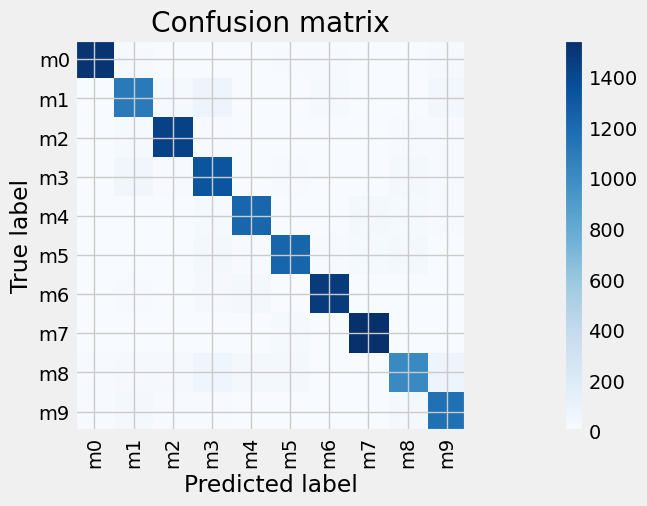

In [136]:
pred3  = cnn_gru_model.predict(x_test2)

617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


Confusion matrix, without normalization
[[ 901  346  208   63   39   51  703   32    2    1]
 [  76   42   21  357  155   97 1151   17  215   73]
 [  14  445  190  348  148  246  795   16   23    6]
 [1980    0    1    4   53    3    1  126    1   55]
 [ 289   10  153   41  195  488    8  454   39  351]
 [   0    0    0    0    1    3   69    1    0    0]
 [  43    2 1335    9   16   11  915    0    0    1]
 [ 302  411  416   66  234  142   50   95  159   81]
 [ 900   22    1   51  667   69  117  112  179   55]
 [ 168  146   25  420  419  183  551   28  184   24]]


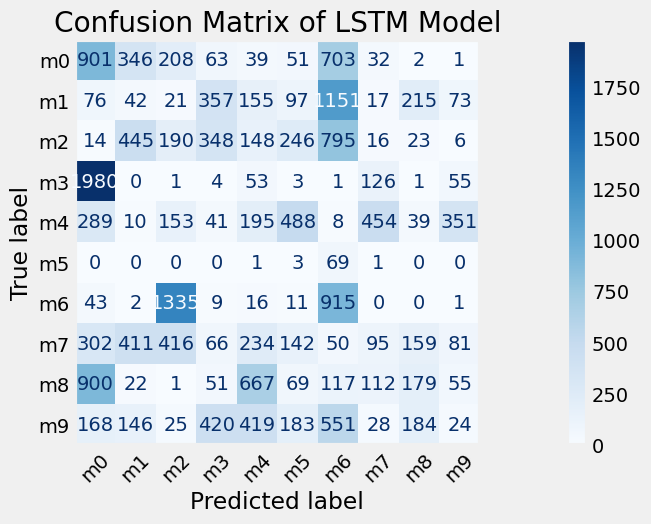

In [137]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Convert one-hot encoded true and predicted labels to class indices
y_test_labels = np.argmax(y_test2, axis=1)
pred_labels = np.argmax(pred3, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_labels, pred_labels)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)

# Plot confusion matrix
plt.rcParams["figure.figsize"] = (20, 5)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["m0", "m1", "m2", "m3", "m4", "m5", "m6", "m7", "m8", "m9"])
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix of LSTM Model")
plt.grid(False)
plt.show()


In [170]:
""" Since I am getting very bad results, let's try normalizing data of each individual before training"""

" Since I am getting very bad results, let's try normalizing data of each individual before training"

In [177]:
#Training and Evaluting model
history3 = cnn_gru_model.fit(x_train, y_train, epochs = 10, validation_split=0.1)
loss3, acc3 = cnn_gru_model.evaluate(x_test, y_test)

Epoch 1/10
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.8959 - loss: 0.3103 - val_accuracy: 0.9110 - val_loss: 0.2533
Epoch 2/10
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.8974 - loss: 0.3070 - val_accuracy: 0.9117 - val_loss: 0.2507
Epoch 3/10
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.8955 - loss: 0.3085 - val_accuracy: 0.9032 - val_loss: 0.2827
Epoch 4/10
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.8989 - loss: 0.3000 - val_accuracy: 0.9149 - val_loss: 0.2437
Epoch 5/10
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.9046 - loss: 0.2899 - val_accuracy: 0.9102 - val_loss: 0.2581
Epoch 6/10
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.8978 - loss: 0.3012 - val_accuracy: 0.9060 - val_loss: 0.2700
Epoch 7/10
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.9028 - loss: 0.2875 - val_accuracy: 0.9189 - val_loss: 0.2328
Epoch 8/10
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.9025 -

In [178]:
"""The above one was after using standarscaler on the data"""

'The above one was after using standarscaler on the data'

In [183]:
scaler.fit(x_test2)
x_test2 = scaler.transform(x_test2)

In [184]:
pred4  = cnn_gru_model.predict(x_test2)

617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [185]:
#after getting prediction checking maximum score prediction to claim which emotion this brain signal belongs to
pred5 = np.argmax(pred4,axis=1)

In [186]:
#inversing the one hot encoding
y_test5 =   np.argmax(y_test2,axis=1)

In [187]:
#printing first 10 Actual and predicted outputs of Test brain signals 
print("Predicted:  ",pred5[:10])
print("\n")
print("Actual: ",y_test5[:10])

Predicted:   [4 3 6 5 6 7 7 5 1 6]


Actual:  [7 1 8 4 2 4 4 0 2 2]


Confusion matrix, without normalization
[[ 837  554  280   91   38   55  448   40    1    2]
 [  38   34    8  433  119   75 1259   29  143   66]
 [  20  516  157  354  146  265  706   43   12   12]
 [1547    0    0    3  143    3    5  425    1   97]
 [ 126   13  106   62  226  376    9  837   17  256]
 [   0    0    0    0    2    0   72    0    0    0]
 [  40    4 1060   17   36    3 1170    0    0    2]
 [ 233  426  320  152  279  140   80  157  100   69]
 [ 637   36    1   99  599   83  141  231  273   73]
 [ 138  193   21  571  321  193  522   56  104   29]]


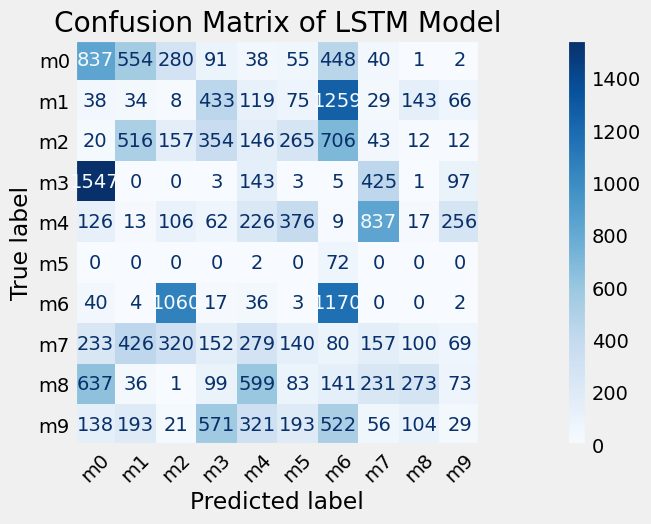

In [189]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Convert one-hot encoded true and predicted labels to class indices
y_test_labels = np.argmax(y_test2, axis=1)
pred_labels = np.argmax(pred4, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_labels, pred_labels)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)

# Plot confusion matrix
plt.rcParams["figure.figsize"] = (20, 5)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["m0", "m1", "m2", "m3", "m4", "m5", "m6", "m7", "m8", "m9"])
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix of LSTM Model")
plt.grid(False)
plt.show()


In [190]:
""" Since this didn't work, now I am trying out DANN, which might be helpful since we are taking different subjects data to train it. """


" Since this didn't work, now I am trying out DANN, which might be helpful since we are taking different subjects data to train it. "

In [191]:
import torch
import torch.nn as nn
from torch.autograd import Function

# Gradient Reversal Layer
class GradReverse(Function):
    @staticmethod
    def forward(ctx, x, lambd):
        ctx.lambd = lambd
        return x.view_as(x)
    @staticmethod
    def backward(ctx, grad_output):
        return grad_output.neg() * ctx.lambd, None

class GRL(nn.Module):
    def __init__(self, lambd=1.0):
        super().__init__()
        self.lambd = lambd
    def forward(self, x):
        return GradReverse.apply(x, self.lambd)

# Feature Extractor
class FeatureExtractor(nn.Module):
    def __init__(self, input_dim=30):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
        )
    def forward(self, x):
        return self.net(x)


In [192]:
class LabelPredictor(nn.Module):
    def __init__(self, feature_dim=64, num_classes=10):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(feature_dim, 32),
            nn.ReLU(),
            nn.Linear(32, num_classes)
        )
    def forward(self, x):
        return self.net(x)


In [193]:
class DomainClassifier(nn.Module):
    def __init__(self, feature_dim=64, num_domains=4):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(feature_dim, 32),
            nn.ReLU(),
            nn.Linear(32, num_domains)
        )
    def forward(self, x):
        return self.net(x)


In [194]:
class DANN(nn.Module):
    def __init__(self, input_dim=30, num_classes=10, num_domains=4, lambd=1.0):
        super().__init__()
        self.feature_extractor = FeatureExtractor(input_dim)
        self.label_predictor = LabelPredictor(64, num_classes)
        self.domain_classifier = DomainClassifier(64, num_domains)
        self.grl = GRL(lambd)
    def forward(self, x, alpha=1.0):
        features = self.feature_extractor(x)
        class_output = self.label_predictor(features)
        domain_output = self.domain_classifier(self.grl(features))
        return class_output, domain_output


In [196]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# Assume model, optimizer, and dataloaders are defined
model = DANN(input_dim=30, num_classes=10, num_domains=4, lambd=1.0)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for (x_s, y_s, d_s), (x_t, _, d_t) in zip(source_loader, target_loader):
        # Concatenate source and target for domain classifier
        x = torch.cat([x_s, x_t], dim=0)
        d = torch.cat([d_s, d_t], dim=0)

        # Forward pass
        class_out, domain_out = model(x)

        # Split outputs
        class_out_s = class_out[:len(x_s)]
        domain_out_all = domain_out

        # Losses
        label_loss = F.cross_entropy(class_out_s, y_s)
        domain_loss = F.cross_entropy(domain_out_all, d)

        # Combine losses (lambda can be scheduled)
        loss = label_loss + domain_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


NameError: name 'source_loader' is not defined

In [200]:
features_1['domain'] = 0  # Enoch
features_2['domain'] = 1  # Kartik
features_3['domain'] = 2  # Muskan
KartikFeatures['domain'] = 3 #Rishita not kartik
combined_features = pd.concat([features_1, features_2, features_3], ignore_index=True)


In [201]:
X = combined_features.iloc[:, :30].values  # shape: [num_samples, 30]
y = combined_features['Class'].values      # shape: [num_samples]
d = combined_features['domain'].values     # shape: [num_samples]


In [202]:
# Example: Use muskan (domain 2) as target, others as source
source_mask = (d == 0) | (d == 1)
target_mask = (d == 2)

X_source = X[source_mask]
y_source = y[source_mask]
d_source = d[source_mask]

X_target = X[target_mask]
y_target = y[target_mask]
d_target = d[target_mask]


In [203]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_source = scaler.fit_transform(X_source)
X_target = scaler.transform(X_target)


In [204]:
import torch

X_source = torch.tensor(X_source, dtype=torch.float32)
y_source = torch.tensor(y_source, dtype=torch.long)
d_source = torch.tensor(d_source, dtype=torch.long)

X_target = torch.tensor(X_target, dtype=torch.float32)
y_target = torch.tensor(y_target, dtype=torch.long)
d_target = torch.tensor(d_target, dtype=torch.long)


In [206]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load and Label Data
features_1 = pd.read_csv("./Features all/extracted_features_enoch.csv")
features_2 = pd.read_csv("./Features all/extracted_features_kartik.csv")
features_3 = pd.read_csv("./Features all/extracted_features_muskan.csv")
features_1['domain'] = 0
features_2['domain'] = 1
features_3['domain'] = 2
combined_features = pd.concat([features_1, features_2, features_3], ignore_index=True)

# 2. Prepare Features and Labels
# Assume last column is your one-hot encoded label, or adjust as needed
# If label is one-hot, convert to class index
if combined_features.iloc[:, -2:].values.shape[1] > 1:  # last 2 columns are one-hot
    y = np.argmax(combined_features.iloc[:, -2:].values, axis=1)
    X = combined_features.iloc[:, :-2].values
else:
    y = combined_features['label'].values  # adjust if label column is named differently
    X = combined_features.iloc[:, :-2].values
d = combined_features['domain'].values

# 3. Train/Test Split (simulate cross-subject: e.g., use muskan as target)
source_mask = (d == 0) | (d == 1)
target_mask = (d == 2)
X_source, y_source, d_source = X[source_mask], y[source_mask], d[source_mask]
X_target, y_target, d_target = X[target_mask], y[target_mask], d[target_mask]

# 4. Standardize Features
scaler = StandardScaler()
X_source = scaler.fit_transform(X_source)
X_target = scaler.transform(X_target)

# 5. Convert to Torch Tensors
X_source = torch.tensor(X_source, dtype=torch.float32)
y_source = torch.tensor(y_source, dtype=torch.long)
d_source = torch.tensor(d_source, dtype=torch.long)
X_target = torch.tensor(X_target, dtype=torch.float32)
y_target = torch.tensor(y_target, dtype=torch.long)
d_target = torch.tensor(d_target, dtype=torch.long)

# 6. DataLoaders
source_dataset = TensorDataset(X_source, y_source, d_source)
target_dataset = TensorDataset(X_target, y_target, d_target)
source_loader = DataLoader(source_dataset, batch_size=64, shuffle=True)
target_loader = DataLoader(target_dataset, batch_size=64, shuffle=True)

# 7. DANN Model Definition
class GradReverse(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x, lambd):
        ctx.lambd = lambd
        return x.view_as(x)
    @staticmethod
    def backward(ctx, grad_output):
        return grad_output.neg() * ctx.lambd, None

class GRL(nn.Module):
    def __init__(self, lambd=1.0):
        super().__init__()
        self.lambd = lambd
    def forward(self, x):
        return GradReverse.apply(x, self.lambd)

class FeatureExtractor(nn.Module):
    def __init__(self, input_dim=30):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
        )
    def forward(self, x):
        return self.net(x)

class LabelPredictor(nn.Module):
    def __init__(self, feature_dim=64, num_classes=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(feature_dim, 32),
            nn.ReLU(),
            nn.Linear(32, num_classes)
        )
    def forward(self, x):
        return self.net(x)

class DomainClassifier(nn.Module):
    def __init__(self, feature_dim=64, num_domains=3):  # Only 3 domains in your data
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(feature_dim, 32),
            nn.ReLU(),
            nn.Linear(32, num_domains)
        )
    def forward(self, x):
        return self.net(x)

class DANN(nn.Module):
    def __init__(self, input_dim=30, num_classes=2, num_domains=3, lambd=1.0):
        super().__init__()
        self.feature_extractor = FeatureExtractor(input_dim)
        self.label_predictor = LabelPredictor(64, num_classes)
        self.domain_classifier = DomainClassifier(64, num_domains)
        self.grl = GRL(lambd)
    def forward(self, x):
        features = self.feature_extractor(x)
        class_output = self.label_predictor(features)
        domain_output = self.domain_classifier(self.grl(features))
        return class_output, domain_output

# 8. Training Loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DANN(input_dim=30, num_classes=2, num_domains=3, lambd=1.0).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    for (x_s, y_s, d_s), (x_t, _, d_t) in zip(source_loader, target_loader):
        x_s, y_s, d_s = x_s.to(device), y_s.to(device), d_s.to(device)
        x_t, d_t = x_t.to(device), d_t.to(device)
        # Concatenate source and target for domain classifier
        x = torch.cat([x_s, x_t], dim=0)
        d = torch.cat([d_s, d_t], dim=0)
        # Forward pass
        class_out, domain_out = model(x)
        # Split outputs
        class_out_s = class_out[:len(x_s)]
        domain_out_all = domain_out
        # Losses
        label_loss = F.cross_entropy(class_out_s, y_s)
        domain_loss = F.cross_entropy(domain_out_all, d)
        loss = label_loss + domain_loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

# 9. Evaluation on Target Domain
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for x_test, y_test, _ in target_loader:
        x_test, y_test = x_test.to(device), y_test.to(device)
        class_out, _ = model(x_test)
        preds = class_out.argmax(dim=1)
        correct += (preds == y_test).sum().item()
        total += y_test.size(0)
print(f"Accuracy on target subject: {correct / total:.2%}")


Epoch 1/50, Loss: 1.1921
Epoch 2/50, Loss: 1.1908
Epoch 3/50, Loss: 1.2091
Epoch 4/50, Loss: 1.2520
Epoch 5/50, Loss: 1.2336
Epoch 6/50, Loss: 1.1790
Epoch 7/50, Loss: 1.1747
Epoch 8/50, Loss: 1.1856
Epoch 9/50, Loss: 1.2735
Epoch 10/50, Loss: 1.2156
Epoch 11/50, Loss: 1.1985
Epoch 12/50, Loss: 1.1766
Epoch 13/50, Loss: 1.2049
Epoch 14/50, Loss: 1.2187
Epoch 15/50, Loss: 1.1641
Epoch 16/50, Loss: 1.1753
Epoch 17/50, Loss: 1.2187
Epoch 18/50, Loss: 1.1781
Epoch 19/50, Loss: 1.1749
Epoch 20/50, Loss: 1.1639
Epoch 21/50, Loss: 1.1826
Epoch 22/50, Loss: 1.1629
Epoch 23/50, Loss: 1.1758
Epoch 24/50, Loss: 1.1773
Epoch 25/50, Loss: 1.1724
Epoch 26/50, Loss: 1.1640
Epoch 27/50, Loss: 1.1939
Epoch 28/50, Loss: 1.1494
Epoch 29/50, Loss: 1.1645
Epoch 30/50, Loss: 1.1782
Epoch 31/50, Loss: 1.1775
Epoch 32/50, Loss: 1.2274
Epoch 33/50, Loss: 1.2095
Epoch 34/50, Loss: 1.1653
Epoch 35/50, Loss: 1.1735
Epoch 36/50, Loss: 1.1971
Epoch 37/50, Loss: 1.1788
Epoch 38/50, Loss: 1.2082
Epoch 39/50, Loss: 1.

In [208]:
features_4 = pd.read_csv("/Users/kartikraj/Desktop/EEG project files/Features all/extracted_features_rishitha.csv")
features_4['domain'] = 3  # Set domain label as 3 for this new subject


In [209]:
# If labels are one-hot encoded
if features_4.iloc[:, -2:].values.shape[1] > 1:
    y_new = np.argmax(features_4.iloc[:, -2:].values, axis=1)
    X_new = features_4.iloc[:, :-2].values
else:
    y_new = features_4['label'].values
    X_new = features_4.iloc[:, :-2].values
d_new = features_4['domain'].values


In [210]:
X_new = scaler.transform(X_new)


In [211]:
X_new = torch.tensor(X_new, dtype=torch.float32)
y_new = torch.tensor(y_new, dtype=torch.long)
d_new = torch.tensor(d_new, dtype=torch.long)

new_dataset = TensorDataset(X_new, y_new, d_new)
new_loader = DataLoader(new_dataset, batch_size=64, shuffle=False)


In [212]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for x_test, y_test, _ in new_loader:
        x_test, y_test = x_test.to(device), y_test.to(device)
        class_out, _ = model(x_test)
        preds = class_out.argmax(dim=1)
        correct += (preds == y_test).sum().item()
        total += y_test.size(0)
print(f"Accuracy on new subject (domain 3): {correct / total:.2%}")


Accuracy on new subject (domain 3): 81.82%
